# Plot scan

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from auxPlots import interpolateData, getContours
import seaborn as sns
from nloSbottomXsec import xsecF
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

### Load Recast Data

In [10]:
files = {
         'ATLAS-SUSY-2018-42' :'../results_dataFrames/pp2BB1j_2018_42_New.pcl',
         'ATLAS-SUSY-2018-13' :'../results_dataFrames/pp2BB1j_2018_13_New.pcl',
         'ATLAS-SUSY-2016-08' :'../results_dataFrames/pp2BB1j_2016_08_New.pcl',         
         'CMS-EXO-20-004' :'../results_dataFrames/pp2BB1j_cms_New.pcl'}

recastDataDict = {label : pd.read_pickle(f) for label,f in files.items()}

pts = np.genfromtxt('../CDFOdata_2112_01499v3_Fig9.dat',skip_header=6,names=True)
maxCurve = []
for mn1 in np.unique(pts['mxGeV']):
    maxCurve.append([mn1,max(pts[pts['mxGeV'] == mn1]['deltamGeV'])])
maxCurve = np.array(maxCurve)

### Remove Stable points (delta m < 5 GeV)

In [11]:
# for label,recastData in recastDataDict.items():
#     recastDataDict[label] = recastData[(recastData['mLLP']-recastData['mLSP']) >= 5.0]

### Compute k-factors

In [12]:
for label,df in recastDataDict.items():
    kfactors = []
    for irow,row in df.iterrows():
        msb = row['mLLP']
        xsec = row['Total xsec (pb)']
        k = xsecF(msb)/xsec
        kfactors.append(k)
    df['kfactor'] = kfactors

### Get all model points

In [13]:
msb = 'mLLP'
mn1= 'mLSP'
tau = 'tau_ns'
models = []
mCols = [msb,mn1,tau]
for recastData in recastDataDict.values():
    recastData.sort_values(mCols,inplace=True)
    for row in recastData[mCols].values:
        m = dict(zip(mCols,row.tolist()))
        if m not in models:
            models.append(m)
print('%i models loaded' %len(models))

297 models loaded


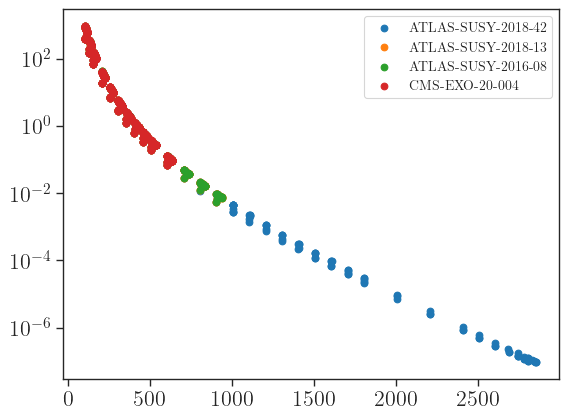

In [14]:
for label,recastData in recastDataDict.items():
    x = recastData['mLLP']
    y = recastData['Total xsec (pb)']
    plt.scatter(x,y,label=label)

plt.legend(fontsize=10)
plt.yscale('log')
plt.show()

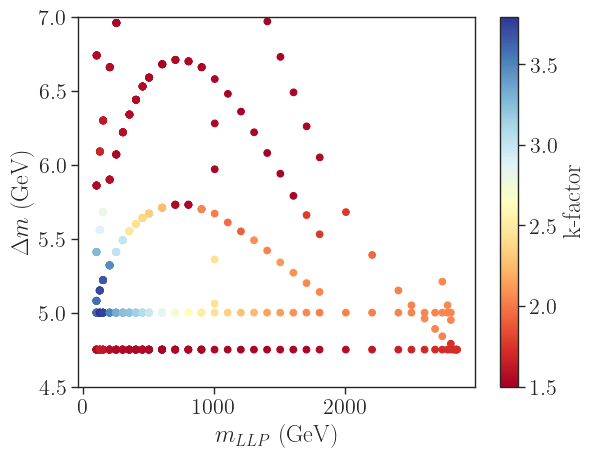

In [26]:
for label,recastData in recastDataDict.items():
    x = recastData['mLLP']
    y = recastData['mLLP']-recastData['mLSP']
    z = recastData['kfactor']
    plt.scatter(x,y,c=z,cmap=cm)

plt.ylim(4.5,7.)
# plt.legend(fontsize=10)
plt.colorbar(label='k-factor')
plt.xlabel(r'$m_{LLP}$ (GeV)')
plt.ylabel(r'$\Delta m$ (GeV)')
# plt.yscale('log')
plt.show()

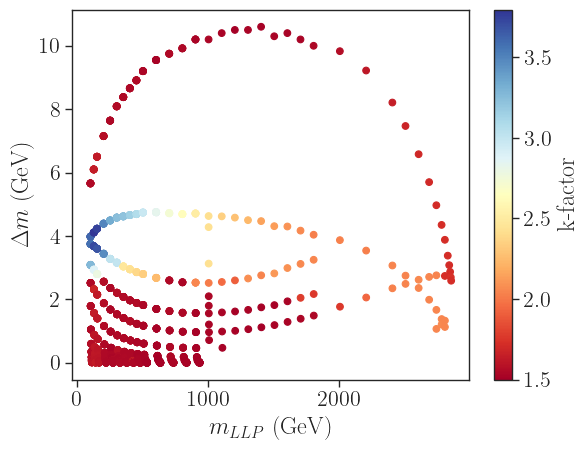

In [28]:
for label,recastData in recastDataDict.items():
    x = recastData['mLLP']
    y = recastData['tau_ns']
    z = recastData['kfactor']
    plt.scatter(x,y,c=z,cmap=cm)

# plt.ylim(4.5,7.)
# plt.legend(fontsize=10)
plt.colorbar(label='k-factor')
plt.xlabel(r'$m_{LLP}$ (GeV)')
plt.ylabel(r'$\Delta m$ (GeV)')
# plt.yscale('log')
plt.show()